In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
plt.style.use("custom.mplstyle")

from decimal import Decimal

import glob

In [2]:
df_learn_lst = []
df_runtime_lst = []

for data_file in glob.glob("../experiments/mc/randman/results_data/df_learn_*.csv"):
#for data_file in glob.glob("../experiments/mc/randman/df_learn_*.csv"):
    df_learn_lst.append(pd.read_csv(data_file))

for data_file in glob.glob("../experiments/mc/randman/results_data/df_runtime_*.csv"):
#for data_file in glob.glob("../experiments/mc/randman/df_runtime_*.csv"):
    df_runtime_lst.append(pd.read_csv(data_file))



df_learn = pd.concat(df_learn_lst, ignore_index=True)
df_runtime = pd.concat(df_runtime_lst, ignore_index=True)

df_learn["N Synapses"] = df_learn["N Input"] * df_learn["N Hidden"] +  df_learn["N Hidden"] * df_learn["N Output"]
df_runtime["N Synapses"] = df_runtime["N Input"] * df_runtime["N Hidden"] +  df_runtime["N Hidden"] * df_runtime["N Output"]

df_runtime["Runtime [$s$]"] = df_runtime["Runtime"]
df_runtime["Runtime [$min$]"] = df_runtime["Runtime"] / 60.

In [3]:
epoch_max = df_learn["Epoch"].max()
epoch_max

3000.0

In [4]:
th = df_runtime["Event Threshold"].unique()
th

array([1.00000000e-05, 2.78255940e-05, 7.74263683e-05, 2.15443469e-04,
       5.99484250e-04, 1.66810054e-03, 4.64158883e-03, 1.29154967e-02,
       3.59381366e-02, 1.00000000e-01, 0.00000000e+00])

In [5]:
df_learn["Model"].unique()

array(['Continuous', 'Event'], dtype=object)

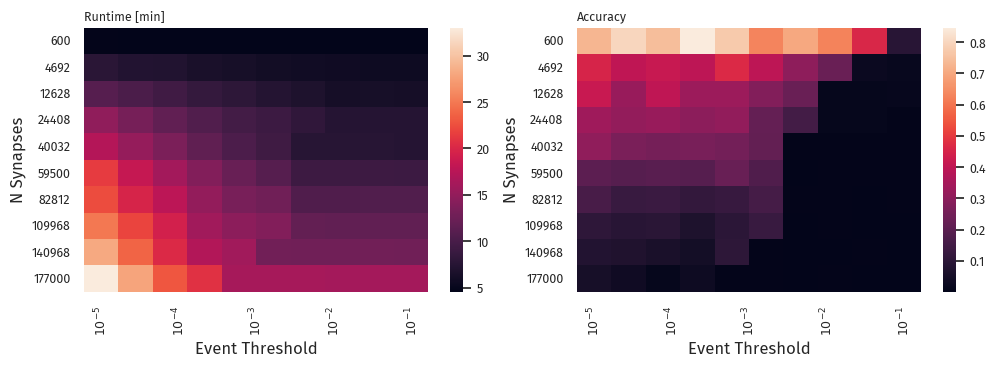

In [38]:
rt_event_fb_algn = pd.pivot_table(df_runtime[(df_runtime["Model"] == "Event") & (df_runtime["Method"] == "Feedback Align")],
               values="Runtime [$min$]", columns="Event Threshold", index="N Synapses", aggfunc="mean")

acc_event_fb_algn = pd.pivot_table(df_learn[(df_learn["Model"] == "Event") & (df_learn["Method"] == "Feedback Align")
                                             & (df_learn["Epoch"] == epoch_max)],
               values="Accuracy", columns="Event Threshold", index="N Synapses", aggfunc="mean")

fig, ax = plt.subplots(1, 2, figsize=(10, 3.5))

sns.heatmap(rt_event_fb_algn, ax=ax[0])

x_ticks = [f"$10^{{{str(x)}}}$" for x in np.arange(-5,0)]
ax[0].set_xticks(np.linspace(0.5, 9.5, 5), x_ticks)
ax[0].set_title("Runtime [min]", loc="left")

sns.heatmap(acc_event_fb_algn, ax=ax[1])
ax[1].set_xticks(np.linspace(0.5, 9.5, 5), x_ticks)
ax[1].set_title("Accuracy", loc="left")

fig.tight_layout(pad=0.1)

fig.savefig("randman_sweep_runtime_fb_algn.pdf")

plt.show()

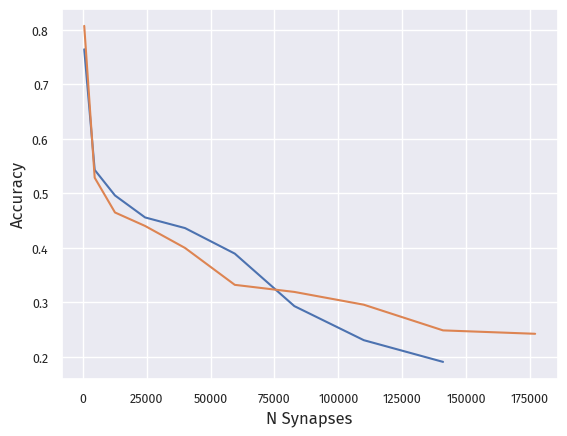

In [15]:
sns.lineplot(df_learn[(df_learn["Model"] == "Continuous") & (df_learn["Method"] == "Backprop")
                                             & (df_learn["Epoch"] == df_learn["Epoch"].max())],
            x="N Synapses", y="Accuracy")

sns.lineplot(df_learn[(df_learn["Model"] == "Event") & (df_learn["Method"] == "Backprop")
                                             & (df_learn["Epoch"] == df_learn["Epoch"].max())
                     & (df_learn["Event Threshold"] <= 1e-5)],
            x="N Synapses", y="Accuracy")

plt.show()

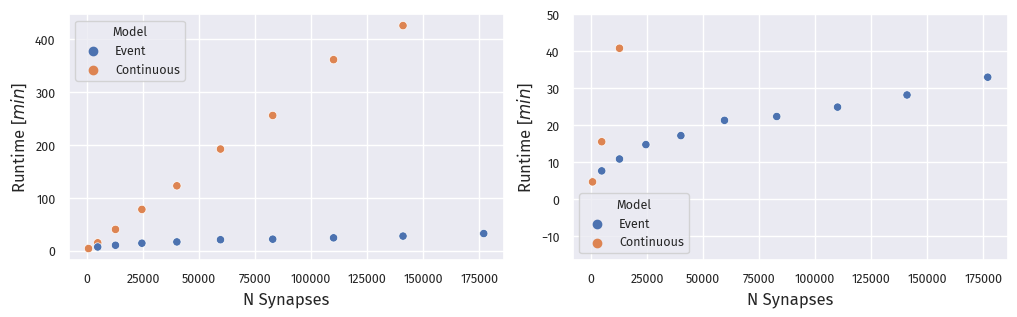

In [40]:
df_rt_fb_algn_th_small = df_runtime[((df_runtime["Event Threshold"] == th[0])
                                   | (df_runtime["Event Threshold"] == 0.))
                                  & (df_runtime["Method"] == "Feedback Align")]

df_rt_fb_algn_th_med = df_runtime[((df_runtime["Event Threshold"] == th[4])
                                   | (df_runtime["Event Threshold"] == 0.))
                                  & (df_runtime["Method"] == "Feedback Align")]

df_rt_fb_algn_th_large = df_runtime[((df_runtime["Event Threshold"] == th[9])
                                   | (df_runtime["Event Threshold"] == 0.))
                                  & (df_runtime["Method"] == "Feedback Align")]

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.scatterplot(data=df_rt_fb_algn_th_small, x="N Synapses", y="Runtime [$min$]", hue="Model", ax=ax[0])

sns.scatterplot(data=df_rt_fb_algn_th_small, x="N Synapses", y="Runtime [$min$]", hue="Model", ax=ax[1])
ax[1].set_ylim(top=50)

fig.tight_layout(pad=0.1, w_pad=1.0)

fig.savefig("randman_sweep_runtime_fb_algn_comp.pdf")

plt.show()